<a href="https://colab.research.google.com/github/JesusMe001/Aprendizaje-supervisado/blob/main/kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive'

# Google colab tools

# Instalar dependendias

# Kernel SVM

# Cómo importar las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el clasificador en el Conjunto de Entrenamiento

In [ ]:
from sklearn.svm import SVC, SVR
classifier = SVC(kernel = "rbf", random_state = 0, gamma=0.1)
classifier.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

# Predicción de los resultados con el Conjunto de Testing

In [ ]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

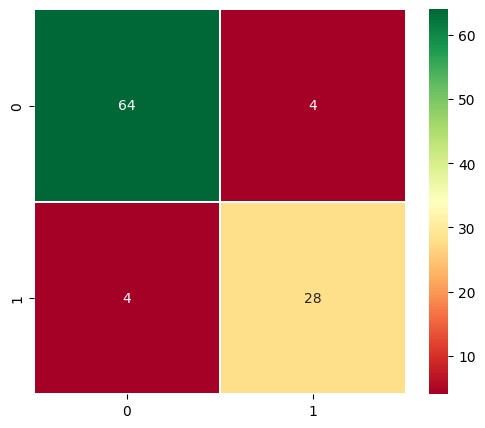

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.show()

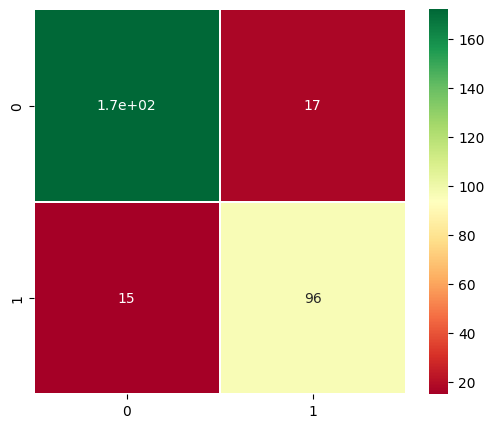

In [ ]:
y_pred_train  = classifier.predict(X_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot= True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing


<ipython-input-14-960be652ad11>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


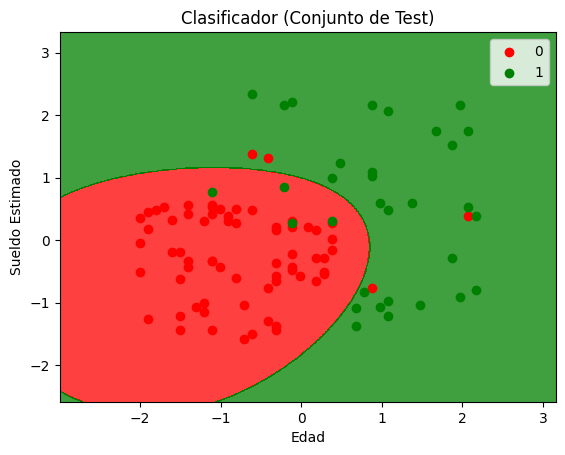

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()


METRICAS

ACURACY

![Machine-Learning-Accuracy[1].png](https://sitiobigdata.com/wp-content/uploads/2019/01/Machine-Learning-Accuracy.png)

MSE

![Machine-Learning-MSE[1].png](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

MAE

![Machine-Learning-MAE[1].png](https://www.easycalculation.com/maths-dictionary/images/mean-absolute-error.png)




In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

accuracy = accuracy_score(y_test, y_pred)
print("\nEl ACCURACY es: ",accuracy)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nEl MSE es: ",mse)
print("\nEl MAE es: ",mae)


El ACCURACY es:  0.92

El MSE es:  0.08

El MAE es:  0.08
